# Stackover Flow Survey Analysis

### By Gautham Nagendra
### Udacity Data Science BootCamp - Project "Write a Data Science Blog Post"

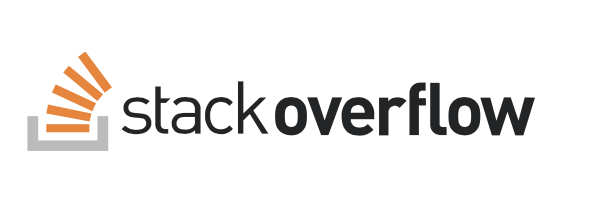



## Motivation

Project I have chosen to go with is the Stackover flow survey analysis. With the 2020 pandemic, a key area of study has been the mental health of employees. Most companies are concerned with the employee stress level especially in a confined environment for a long time. With the survey results, I want to understand if we see an increasing mental health issues with high salaries, does mental health issues shown with a certain experience level and is this region specific. I attempt to answer these questions through this analysis. 

## Business Understanding


### Source

Data set is obtained from Stackover flow website is the complete, cleaned results of the 2021 Stack Overflow Developer Survey. Free response submissions and personally-identifying information have been removed from the results to protect the privacy of respondents. 

There are three files besides this README:

1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
3. so_survey_2021.pdf - PDF file of the survey instrument

The survey was fielded from May 25 2021, to June 15 2021. The median time spent on the survey for qualified responses was 10.21 minutes.

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

As an incentive, respondents who finished the survey could opt into a "Census" badge if they completed the survey.

You can find the official published results here:

https://insights.stackoverflow.com/survey/2021

Find previous survey results here:

https://insights.stackoverflow.com/survey

Legal:

This database - The Public 2021 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/


## Data Understanding

In [908]:
# Load all the packages in notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# Read the survey resutls data set into the notebook

results2021 = pd.read_csv("/Users/gauthamnk/Udacity/Bootcamp/2021_results.csv")


# Read the schema file into the notebpok
schema2021 = pd.read_csv('/Users/gauthamnk/Udacity/Bootcamp/stack-overflow-developer-survey-2021/survey_results_schema.csv')



In [909]:
# Lets Understand the shape of the dataset
print("Dataset has total", results2021.shape[0], " rows and ", results2021.shape[1], " columns in 2021 response dataset.")

Dataset has total 83439  rows and  48  columns in 2021 response dataset.


In [910]:
# What type of data do we have from the dataset
results2021.dtypes.value_counts()

object     45
float64     2
int64       1
dtype: int64

We see that we have two columns that are float and rest are objects. 

The two columns that are float are total compensation and calculated columns of the total compensation to yearly. 

In [911]:
#Lets look at the head of the dataset

results2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [912]:
# Looking at the head of dataframe we can see that there are lot of missing values.
# Lets understand what is percentage of data is missing from the dataframe

percent2021 = (results2021.isnull().sum()/results2021.isnull().count()*100).sort_values(ascending = False)

# Add this result into a dataframe

percent2021 = percent2021.to_frame()
percent2021.reset_index(inplace = True)
percent2021.columns = ['Questions','%_Missing_data']
percent2021['CumSum'] = percent2021["%_Missing_data"]/percent2021["%_Missing_data"].sum()
percent2021["CumSum%"] = np.cumsum(percent2021['CumSum'])*100


percent2021.head(10)

,Questions,%_Missing_data,CumSum,CumSum%
0,UK_Country,94.705114,0.114528,11.452784
1,US_State,82.118674,0.099307,21.383476
2,MiscTechWantToWorkWith,54.432579,0.065826,27.966062
3,PlatformWantToWorkWith,50.120447,0.060611,34.027178
4,ConvertedCompYearly,43.858388,0.053038,39.331016
5,MiscTechHaveWorkedWith,43.605508,0.052733,44.604274
6,CompTotal,43.452103,0.052547,49.858980
7,WebframeWantToWorkWith,37.565167,0.045428,54.401773
8,PlatformHaveWorkedWith,37.517228,0.045370,58.938769
9,CompFreq,37.499251,0.045348,63.473590


<AxesSubplot:label='2ff160e9-c631-435a-8474-f03335436ffe', xlabel='Questions', ylabel='CumSum%'>

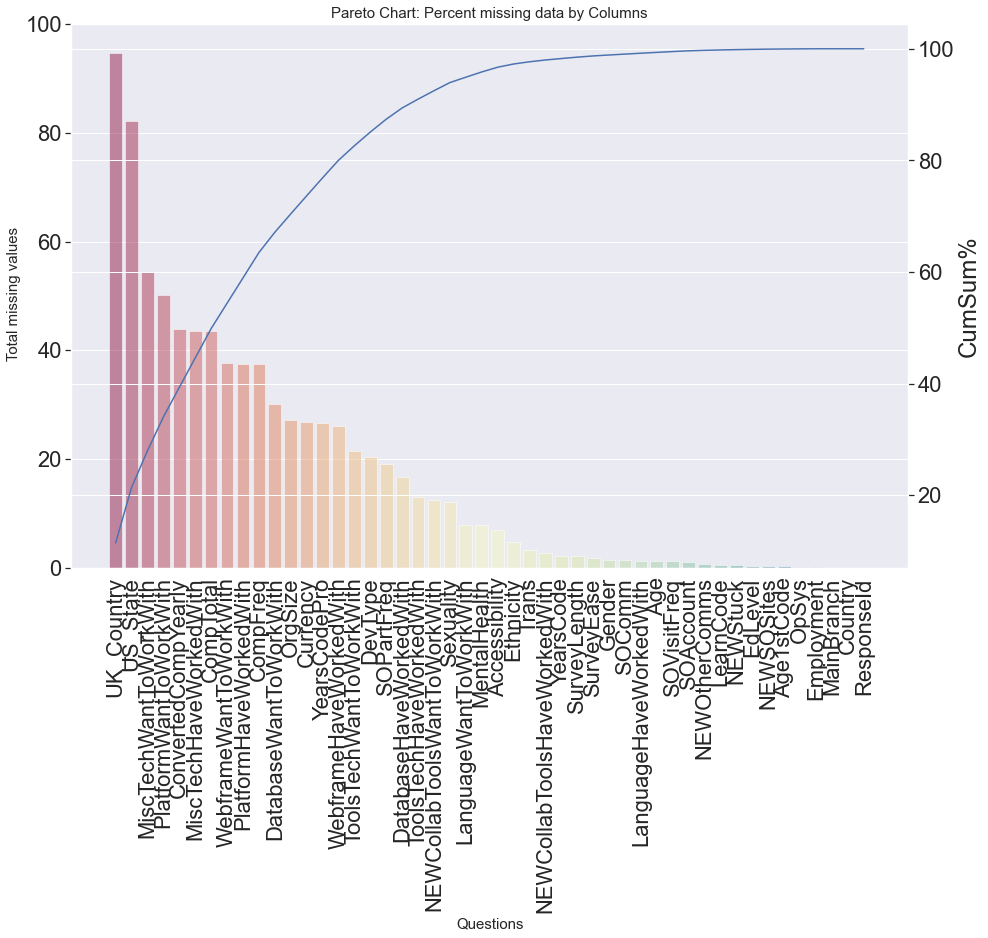

In [913]:
#Lets see the percent missing values graphically

f,ax =plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')

sns.barplot(percent2021['Questions'],percent2021['%_Missing_data'],alpha=0.5, palette = 'Spectral')

plt.xlabel('Questions', fontsize=15)
plt.ylim(0,100)
plt.ylabel(' Total missing values', fontsize=15)
plt.title('Pareto Chart: Percent missing data by Columns', fontsize=15)

ax2 = plt.twinx()
sns.lineplot(percent2021['Questions'],percent2021["CumSum%"], linestyle = 'dashed',ax = ax2, sort = False)



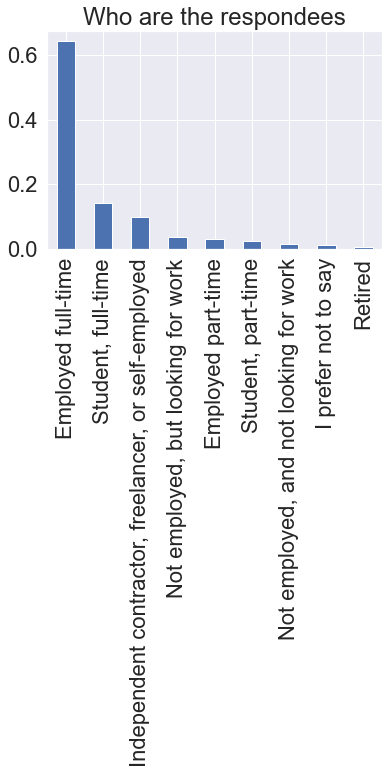

In [914]:
# Lets understand who are the respondess

(results2021.Employment.value_counts()/results2021.shape[0]).plot(kind ='bar')
plt.title("Who are the respondees");


<AxesSubplot:title={'center':'Yearly Compenstation of Survey Respondents'}>

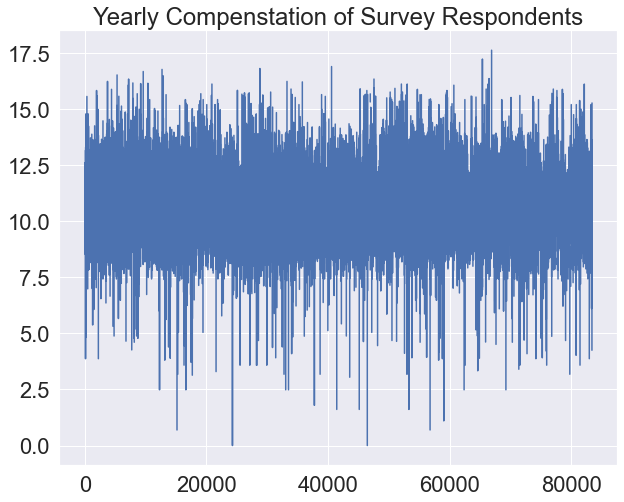

In [915]:
# lets see the COmpensation spread yearly of the respondents
#Convert to log so that we can have the comparisson on same scale

np.log(results2021['ConvertedCompYearly']).plot( figsize = (10,8), 
                                        title = "Yearly Compenstation of Survey Respondents")

# Since we have respondents from differnent countries the below graph might not be 
# 146 diff currency in the dataset


In [916]:
# Since we have object colums, lets see what are the unique values in each column

results2021.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MainBranch                          6
Employment                          9
Country                           181
US_State                           55
UK_Country                          4
EdLevel                             9
Age1stCode                          9
LearnCode                         458
YearsCode                          52
YearsCodePro                       52
DevType                          8626
OrgSize                            10
Currency                          146
CompFreq                            3
LanguageHaveWorkedWith          28690
LanguageWantToWorkWith          27545
DatabaseHaveWorkedWith           3072
DatabaseWantToWorkWith           3137
PlatformHaveWorkedWith            118
PlatformWantToWorkWith            126
WebframeHaveWorkedWith           5402
WebframeWantToWorkWith           5113
MiscTechHaveWorkedWith           1387
MiscTechWantToWorkWith           1684
ToolsTechHaveWorkedWith           902
ToolsTechWantToWorkWith          1403
NEWCollabToo

## Prepare Data

Lets prepare our data to further answer the below business questions 

1. what is affecting the mental health of responders
2. Is mental health issues common among experienced developers, high salaries
3. Is the rising mental issues to a certain region

To answer this question, we need to treat Mental Health columns as target variable. 

In [917]:
# ------------------------------------------------------------------------#

# We need to have a traget column with data that truly represents the output of our model.
# To further understand the behviour, we can narrow down the dataframe by leaving/dropping out resepondents who did not to
# mental helth question

# ------------------------------------------------------------------------#

# lets prepare for data by eliminating missing rows 

# Start by checking if the target colums has missing data

results2021['MentalHealth'].isnull().value_counts()

False    76920
True      6519
Name: MentalHealth, dtype: int64

We can see that we 6519 rows that has missing values in the Mental health column

In [918]:
# Drop the rows that has missing data from the target variable column

results2021 = results2021.dropna(subset =[ "MentalHealth"], axis = 0)

In [919]:
# We have 48 columsn and all might not be needed for our study
# lets reduce the columns with missing data > 50%

results2021 = results2021.dropna(thresh=0.50*len(results2021), axis=1)
results2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSys', 'NEWStuck', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms',
       'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [920]:
results2021.shape

(76920, 45)

This further helps us to reduce the feature based on the missing values 

We have reduced the number of columns from 48 to 44

In [921]:
# Now lets check how many missing values we still have
results2021.isnull().sum().sort_values(ascending = False)

# We know what we have less that 1% of the overall dataset. 

PlatformWantToWorkWith          38075
MiscTechHaveWorkedWith          33184
ConvertedCompYearly             32290
CompTotal                       31976
WebframeWantToWorkWith          28497
PlatformHaveWorkedWith          28430
CompFreq                        27719
DatabaseWantToWorkWith          22809
OrgSize                         20638
Currency                        20495
YearsCodePro                    20097
WebframeHaveWorkedWith          19727
ToolsTechWantToWorkWith         15899
DevType                         15334
SOPartFreq                      14238
DatabaseHaveWorkedWith          12537
ToolsTechHaveWorkedWith          9516
NEWCollabToolsWantToWorkWith     9149
Sexuality                        6494
LanguageWantToWorkWith           5838
NEWCollabToolsHaveWorkedWith     1762
Accessibility                    1544
Ethnicity                        1355
YearsCode                        1323
LanguageHaveWorkedWith            886
Trans                             842
SOComm      

In [922]:
#lets look at the data types of these columns 
results2021.dtypes

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object
ToolsTechHaveWorkedWith          object
ToolsTechWantToWorkWith          object


In [923]:
# For the float columns we can impute with the mean values for the year compensation of the survey responders 

results2021["ConvertedCompYearly"] = results2021["ConvertedCompYearly"].fillna(results2021["ConvertedCompYearly"].mean())

In [924]:
#convert float of the value to interger

results2021["ConvertedCompYearly"]= results2021["ConvertedCompYearly"].astype(int)

#lets look at the values
results2021["ConvertedCompYearly"].describe

<bound method NDFrame.describe of 0         62268
1        118402
2        118402
5        118402
6        118402
          ...  
83434    160500
83435      3960
83436     90000
83437    816816
83438     21168
Name: ConvertedCompYearly, Length: 76920, dtype: int64>

In [925]:
# For our target variable Mental health we see numerous reponse and we need to clean up to further undersand 

results2021['MentalHealth'].value_counts().to_frame()

,MentalHealth
None of the above,56459
Prefer not to say,3932
I have a concentration and/or memory disorder (e.g. ADHD),3059
I have an anxiety disorder,2840
"I have a mood or emotional disorder (e.g. depression, bipolar disorder)",2324
"I have a mood or emotional disorder (e.g. depression, bipolar disorder);I have an anxiety disorder",1811
I have autism / an autism spectrum disorder (e.g. Asperger's),1224
"Or, in your own words:",1050
"I have a concentration and/or memory disorder (e.g. ADHD);I have a mood or emotional disorder (e.g. depression, bipolar disorder);I have an anxiety disorder",1009
"I have a concentration and/or memory disorder (e.g. ADHD);I have a mood or emotional disorder (e.g. depression, bipolar disorder)",664


In [926]:
# We see that their are more than two categories and for the purpose of our study we simplify as where the reponsdent has 
# mental health issues or not.

def mhInt(category):
    "Function is categorize Mental Health column "
    if category == "None of the above":
        return "No"
    else:
        return "Yes"

In [927]:
# Now lets apply our function to the dataset

#Add a new column to the dataset that has the binary reply

results2021["MH_Binary"] = results2021["MentalHealth"].map(mhInt)


In [928]:
# lets take a look at the results
results2021["MH_Binary"].value_counts()


No     56459
Yes    20461
Name: MH_Binary, dtype: int64

In [929]:
results2021["MH_Binary"].value_counts()/results2021["MH_Binary"].shape[0]*100

#from the results we can see that 26% of the respondents have some kind of mental issues 

No     73.399636
Yes    26.600364
Name: MH_Binary, dtype: float64

Text(0.5, 1.0, 'Compensation Comparison')

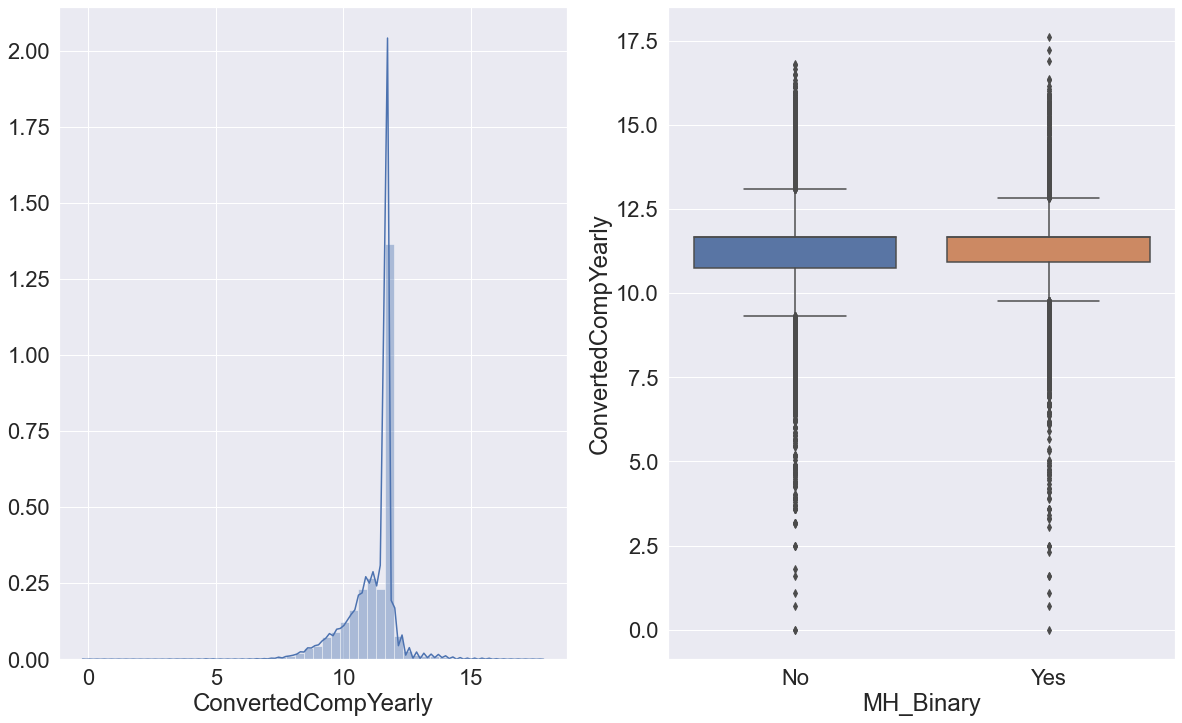

In [930]:

#lets create a seprate dataframe 
results2021_a = results2021[['MH_Binary','ConvertedCompYearly']]

fig,ax = plt.subplots(1,2, figsize=(20,12))

#plot the graphs
sns.distplot(np.log(results2021['ConvertedCompYearly']), ax = ax[0])
axs[0].set_title('Log of yearly compensation')
axs[0].set_xlabel('Logarithmic Year Compensation')
             
sns.boxplot(y = np.log(results2021['ConvertedCompYearly']), x = results2021_a['MH_Binary'], ax = ax[1])
axs[1].set_title('Compensation Comparison')

In [931]:
import scipy.stats as stats

# We can take the appraoch of dispcrtive statistics further to understand if there is a diffence between
# the means of the responses

# We can do a 2 sample t test too find out where there is a staistical difference between the responses

# h0 = Null hypothesis : mean of both group are the same
# h1 = Alternative hypothesis: mean of both groups are difference 

a = results2021.loc[results2021['MH_Binary'] == 'No', 'ConvertedCompYearly']
b = results2021.loc[results2021['MH_Binary'] == 'Yes', 'ConvertedCompYearly']

stats.ttest_ind(a, b, equal_var=True)

Ttest_indResult(statistic=-5.55518237803961, pvalue=2.7823663662184368e-08)

With the high p-value(>0.05) we fail to reject the null hypothesies and can say there is a no diffenrce between the mental health groups. 

We can infere that we need to furhter dig into the differnce to understand on the type of mental disorder compensation may be playing. We also need to investigate disorders outside professional enivornments affecting devlopers as well

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '25-34 years old'),
  Text(1, 0, '18-24 years old'),
  Text(2, 0, 'Prefer not to say'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, 'Under 18 years old'),
  Text(5, 0, '35-44 years old'),
  Text(6, 0, '65 years or older'),
  Text(7, 0, '55-64 years old')])

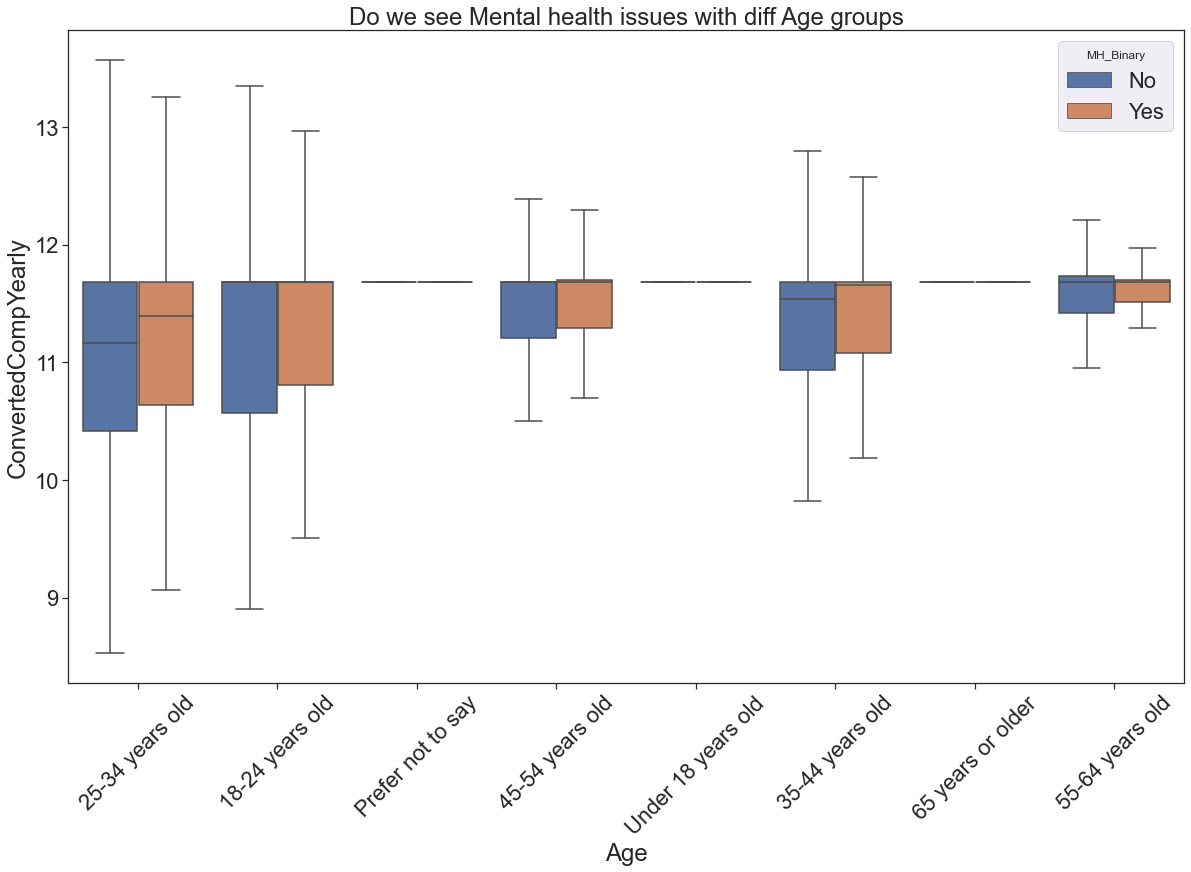

In [932]:
# Now lets understand with respect to the age of the suvey resonders.
# Can we see if age has any affect on mental health of devlopers

#lets set up the plot

sns.set_style('ticks')
fig, ax = plt.subplots()
sns.set(font_scale = 2)
fig.set_size_inches(20, 12)

# Lets plot this  on a boxplot 
fig = sns.boxplot(x = results2021['Age'], y = np.log(results2021['ConvertedCompYearly']),
            hue = results2021['MH_Binary'], 
             showfliers = False).set(title = "Do we see Mental health issues with diff Age groups")

#rotate the x axis labels for better visibility

import matplotlib.pylab as plt
plt.xticks(rotation=45)


Let further understand if years of coding has an impact on Metal Health

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, '1'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '13'),
  Text(5, 0, '14'),
  Text(6, 0, '15'),
  Text(7, 0, '16'),
  Text(8, 0, '17'),
  Text(9, 0, '18'),
  Text(10, 0, '19'),
  Text(11, 0, '2'),
  Text(12, 0, '20'),
  Text(13, 0, '21'),
  Text(14, 0, '22'),
  Text(15, 0, '23'),
  Text(16, 0, '24'),
  Text(17, 0, '25'),
  Text(18, 0, '26'),
  Text(19, 0, '27'),
  Text(20, 0, '28'),
  Text(21, 0, '29'),
  Text(22, 0, '3'),
  Text(23, 0, '30'),
  Text(24, 0, '31'),
  Text(25, 0, '32'),
  Text(26, 0, '33'),
  Text(27, 0, '34'),
  Text(28, 0, '35'),
  Text(29, 0, '36'),
  Text(30, 0, '37'),
  Text(31, 0, '38'),
  Text(32, 0, '39'),
  Text(33, 0, '4'),
  Text(34, 0, '40'),
  Text(35, 0, '41'),
  Text(36, 0, '4

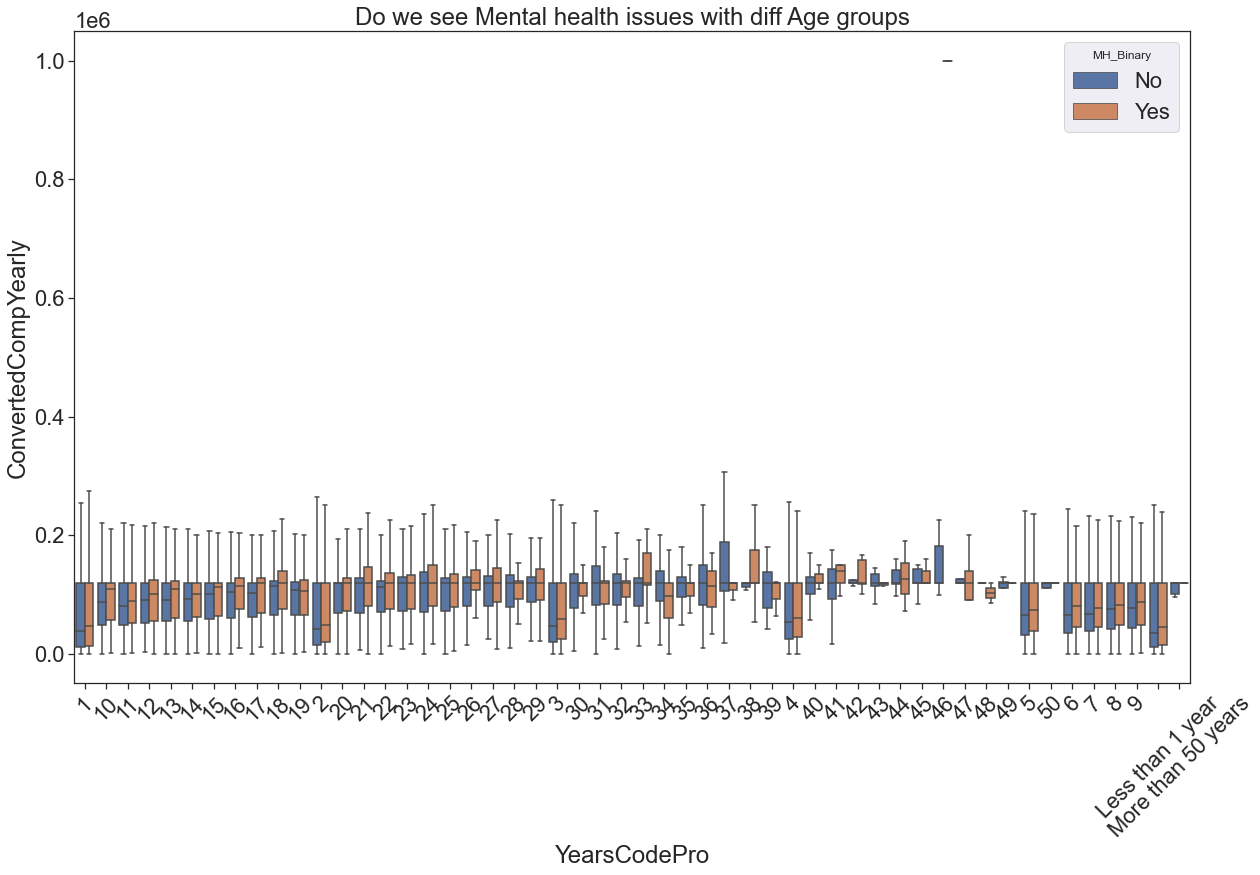

In [933]:

# Now lets understand with respect to the age of the suvey resonders.
# Can we see if age has any affect on mental health of devlopers

#lets set up the plot

sns.set_style('ticks')
fig, ax = plt.subplots()
sns.set(font_scale = 2)
fig.set_size_inches(20, 12)

# Lets plot this  on a boxplot 
fig = sns.boxplot(x = results2021['YearsCodePro'].sort_values(), y = results2021['ConvertedCompYearly'],
            hue = results2021['MH_Binary'], 
             showfliers = False).set(title = "Do we see Mental health issues with diff Age groups")

#rotate the x axis labels for better visibility

import matplotlib.pylab as plt
plt.xticks(rotation=45)

We can actually see that we have veru less evidence to say that professional experice has any impact on the mental health issues. This might be more needed for Company wise anlysis.

In [934]:
# To analyse the impact of mental health with respect to countries, we can narrow down to top 3 coutries.
# USA, India and germany - Majortiry of the repondenets are from

# We apply pareto rule 
results2021_country = results2021['Country'].value_counts().to_frame()
results2021_country ['Percentage Devlopers'] = results2021['Country'].value_counts()/results2021.shape[0]*100
results2021_country

,Country,Percentage Devlopers
United States of America,14355,18.662246
India,9264,12.043682
Germany,5197,6.756370
United Kingdom of Great Britain and Northern Ireland,4236,5.507020
Canada,2806,3.647946
...,...,...
Dominica,1,0.001300
Saint Kitts and Nevis,1,0.001300
"Micronesia, Federated States of...",1,0.001300
Saint Vincent and the Grenadines,1,0.001300


In [935]:
# Now lets slice for data set to include only these coutries
results2021Country_slice = results2021.loc[(results2021['Country'] == 'United States of America' ) | (results2021['Country'] == 'India' ) | (results2021['Country'] == 'Germany' ) ]

In [936]:
df = results2021Country_slice

In [937]:
#lets looks at the new dataset shape
results2021Country_slice.shape

(28816, 46)

<AxesSubplot:xlabel='Country', ylabel='ConvertedCompYearly'>

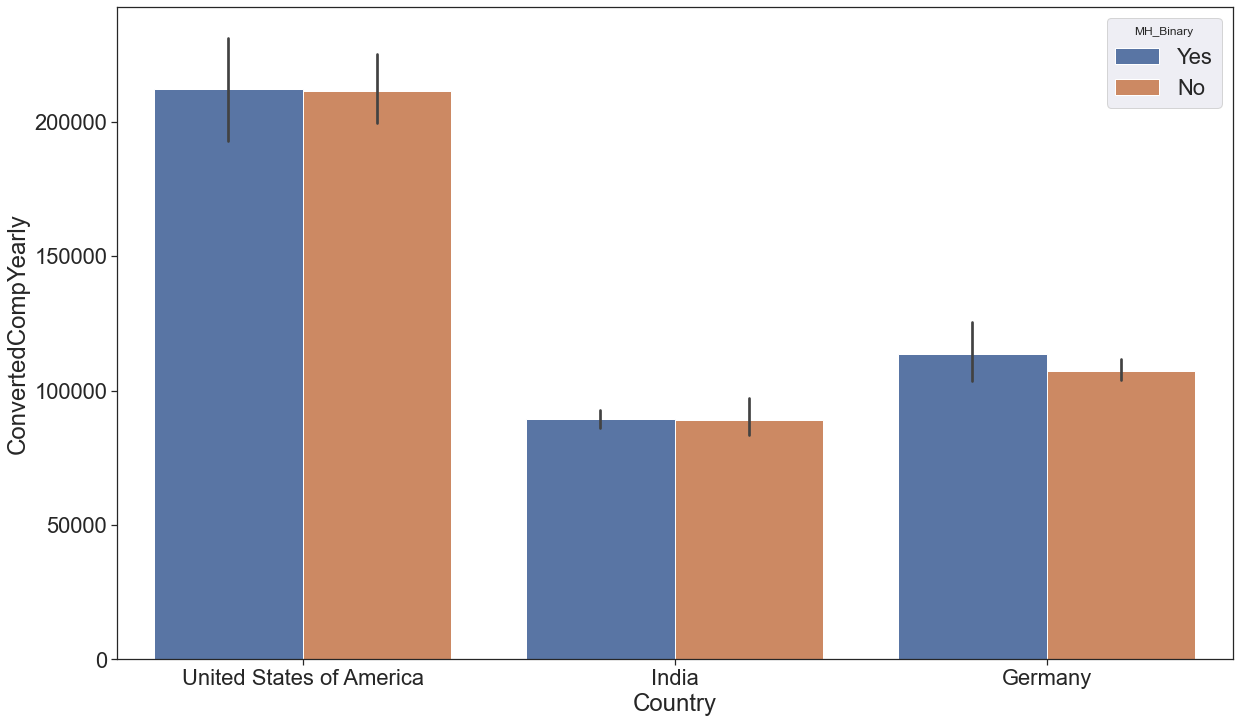

In [938]:
#Lets look at the grahical representation for all the three countries against compensation and split it by mental health issues
sns.set_style('ticks')
fig, ax = plt.subplots()
sns.set(font_scale = 2)
fig.set_size_inches(20, 12)
sns.barplot(x = results2021Country_slice['Country'], y = results2021Country_slice['ConvertedCompYearly'],
            hue = results2021Country_slice['MH_Binary'])

# Conculsion and Next Steps

We need to further dig into the data to understand if mental issues are truly a factor affecting developers. We can develop a machine learning algorithm that can predict heath issues when we look at the last 5 years of responses.